# Importando Bibliotecas

In [ ]:
#pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle as pkl

# Explorando os Dados

In [ ]:
data_credit = pd.read_csv('credit_data.csv')

In [ ]:
data_credit = data_credit.rename(columns={'clientid' : 'id_cliente', 'income' : 'renda', 'age': 'idade', 'loan' : 'divida', 'default' : 'inadimplente'})

In [ ]:
data_credit

In [ ]:
data_credit.head(10)
data_credit.tail()

In [ ]:
data_credit.describe()

In [ ]:
data_credit[data_credit['renda'] >= 69995.685578]

In [ ]:
data_credit[data_credit['divida'] <= 2000.000000]

In [ ]:
data_credit['inadimplente'].value_counts()

In [ ]:
np.unique(data_credit['inadimplente'], return_counts=True)

In [ ]:
sns.countplot(x = data_credit['inadimplente'])

In [ ]:
plt.hist(x = data_credit['idade']);

In [ ]:
plt.hist(x = data_credit['renda']);

In [ ]:
plt.hist(x = data_credit['divida']);


In [ ]:
grafico = px.scatter_matrix(data_credit, dimensions=['idade', 'renda', 'divida'], color = 'inadimplente')
grafico.show()

## Tratando Valores Inconsistentes

In [ ]:
data_credit.loc[data_credit['idade'] < 0]

In [ ]:
data_credit[data_credit['idade'] < 0]

In [ ]:
data_credit[data_credit['idade'] < 0]

In [ ]:
data_credit2  = data_credit.drop('idade', axis=1)

In [ ]:
data_credit[data_credit['idade'] < 0].index

In [ ]:
data_credit3  = data_credit.drop(data_credit[data_credit['idade'] < 0].index)
data_credit3

In [ ]:
data_credit.mean()

In [ ]:
data_credit['idade'][data_credit['idade'] > 0].mean()

In [ ]:
data_credit.loc[data_credit['idade'] < 0, 'idade' ] = 40.92

In [ ]:
data_credit.head(26)

## Tratamento de Valores Faltantes

In [ ]:
data_credit.isnull().sum()

In [ ]:
data_credit.loc[pd.isnull( data_credit['idade'])]

In [ ]:
data_credit.loc[data_credit['idade'].isnull()]

In [ ]:
data_credit['idade'] = data_credit['idade'].fillna(data_credit['idade'].mean())

In [ ]:
data_credit.loc[(data_credit['id_cliente'] == 29) | (data_credit['id_cliente'] == 31) | (data_credit['id_cliente'] == 32)]

In [ ]:
data_credit.loc[data_credit['id_cliente'].isin([29,31,32])]

## Divisão Entre Previsores e Classes

In [ ]:
x_credit = data_credit.iloc[:, 1:4].values

In [ ]:
type(x_credit)

In [ ]:
y_credit = data_credit.iloc[:, 4].values

In [ ]:
y_credit

## Escalonamento dos Valores

In [ ]:
x_credit


In [ ]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:,2].min()

In [ ]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

In [ ]:
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:,2].min()

In [ ]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

# Base de Dados do Censo

## Exploração dos Dados

![Captura de tela 2024-01-10 194934.png](<attachment:Captura de tela 2024-01-10 194934.png>)
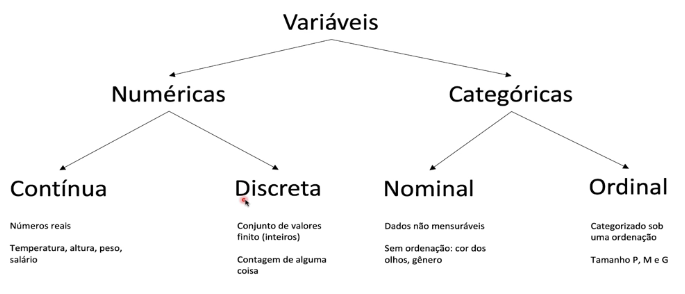

In [ ]:
data_census = pd.read_csv('census.csv')

In [ ]:
data_census

In [ ]:
data_census.describe()

In [ ]:
data_census.isnull().value_counts()

## Vizualização dos Dados

In [ ]:
np.unique(data_census['income'])

In [ ]:
data_census['income'].value_counts()

In [ ]:
#sns.countplot(x = data_census['income'])

In [ ]:
#plt.hist(x = data_census['age']);

In [ ]:
#plt.hist(x = data_census['education-num']);

In [ ]:
#plt.hist(x = data_census['hour-per-week']);

In [ ]:
#grafico = px.treemap(data_census, path=['workclass', 'age']);
#grafico.show()

In [ ]:
#grafico = px.treemap(data_census, path=['occupation', 'relationship', 'age']);
#grafico.show()

In [ ]:
#grafico = px.parallel_categories(data_census, dimensions=['occupation', 'relationship'])
#grafico.show()

In [ ]:
#grafico = px.parallel_categories(data_census, dimensions=['workclass','occupation', 'income'])
#grafico.show()

In [ ]:
#grafico = px.parallel_categories(data_census, dimensions=['education', 'income'])
#grafico.show()

## Divisão Entre Pevisores e Classes 

In [ ]:
data_census

In [ ]:
x_census = data_census.iloc[:, 0:14].values

In [ ]:
y_census = data_census.iloc[:, 14].values

In [ ]:
y_census

## Tratamento de Atributos Categóticos

### LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_test = LabelEncoder()

In [ ]:
test = label_enconder_test.fit_transform(x_census[:,1])

In [ ]:
test

In [ ]:
label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label_enconder_marital = LabelEncoder()
label_enconder_occupation = LabelEncoder()
label_enconder_relationship = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex = LabelEncoder()
label_enconder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_enconder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_enconder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_enconder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_enconder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_enconder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_enconder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_enconder_sex.fit_transform(x_census[:,9])
x_census[:,13]  = label_enconder_country.fit_transform(x_census[:,13])


### OneHotEnconder

In [ ]:
# Carro
# Gol   Pálio   Uno
# 1     2       3

# Gol   1 0 0
# Pálio 0 1 0
# Uo    0 0 1

In [ ]:
len(data_census['workclass'].value_counts())

In [ ]:
data_census['workclass'].value_counts()

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotenconder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough') #remainder='passthrough' não apaga os outros atributos

In [ ]:
x_census = onehotenconder_census.fit_transform(x_census).toarray()

In [ ]:
x_census

In [ ]:
x_census.shape

## Escalonamento de Valores

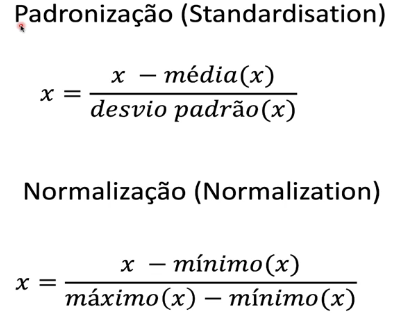

from sklearn.preprocessing import StandardScaler

In [ ]:
sacaler_census = StandardScaler()
x_census = sacaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

## Divisão das Bases em Treinamento e Testes

from sklearn.model_selection import train_test_split

### Credit Data

In [ ]:
x_credit_training, x_credit_test, y_credit_training, y_credit_test = train_test_split(x_credit, y_credit, test_size = 0.25, random_state=0) #random_state=0 ter os mesmos registros 

In [ ]:
x_credit_training.shape

In [ ]:
y_credit_training.shape

In [ ]:
x_credit_test.shape, y_credit_test.shape

### Census Data

In [ ]:
x_census_training, x_census_test, y_census_training, y_census_test = train_test_split(x_census, y_census, test_size = 0.15, random_state=0) #random_state=0 ter os mesmos registros 


In [ ]:
x_census_training.shape, y_census_training.shape

In [ ]:
x_census_test.shape, y_census_test.shape

## Salvar as Variáveis

import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
    pkl.dump([x_credit_training, y_credit_training, x_credit_test, y_credit_test], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
    pkl.dump([x_census_training, y_census_training, x_census_test, y_census_test], f)